In [7]:
import pandas as pd
import numpy as np
from unidecode import unidecode

In [8]:
df01 = pd.read_csv('../csv_files/NHL_Final-01.csv')
df02 = pd.read_csv('../csv_files/NHL_Final-02.csv')


In [9]:
df02 = df02.drop(columns = ['GP', 'Pos', 'TK', 'GV', '-9999'])
df02.head()


,Player,CF,CA,CF%,CF% rel,FF,FA,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),E+/-,SAtt.,Thru%
0,Wyatt Aamodt,23,37,38.3,-15.0,18,21,46.2,-10.3,10.0,100.0,110.0,20.0,80.0,17:07,16:16,0.1,6,50.0
1,Rodrigo Abols,191,199,49.0,0.3,137,135,50.4,0.3,8.3,84.7,93.0,61.2,38.8,9:11,9:09,-1.4,48,52.1
2,Noel Acciari,729,957,43.2,-8.9,506,658,43.5,-7.6,6.8,88.6,95.4,20.3,79.7,13:46,11:20,-11.9,151,49.7
3,Jack Ahcan,30,32,48.4,-0.9,22,19,53.7,0.1,11.1,93.3,104.4,26.7,73.3,15:48,14:40,0.2,3,33.3
4,Sebastian Aho,1519,968,61.1,2.8,1094,721,60.3,3.3,10.8,85.8,96.7,63.8,36.2,20:06,14:49,9.1,447,46.3


In [10]:
df01['Player'] = df01['Player'].apply(unidecode).str.lower().str.strip()
df02 ['Player'] = df02['Player'].apply(unidecode).str.lower().str.strip()
df03 = pd.merge (df01, df02, how = 'left', on='Player')

In [11]:
df03 = df03.drop(df03[df03['GP'] <= 41].index).reset_index(drop = True)

df03 = df03.replace({'RW': 'F', 'LW': 'F', 'C': 'F'})

df03 = df03.drop (df03[df03['Pos'] == 'G'].index).reset_index(drop = True)

df03 = df03.replace({'--': 0})

df03 = df03.fillna(0)

In [12]:
df03.head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,EVG,...,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),E+/-,SAtt.,Thru%
0,nikita kucherov,31.0,F,78,37,84,121,22,45,29,...,13.7,90.1,103.9,59.6,40.4,21:11,17:21,16.3,550.0,48.2
1,nathan mackinnon,29.0,F,79,32,84,116,25,41,23,...,11.0,88.9,99.9,63.8,36.2,22:47,18:54,35.1,590.0,54.2
2,leon draisaitl,29.0,F,71,52,54,106,32,34,36,...,10.7,89.9,100.7,60.6,39.4,21:31,18:11,27.3,417.0,57.8
3,david pastrnak,28.0,F,82,43,63,106,0,42,34,...,13.3,87.3,100.5,68.8,31.2,20:11,16:42,1.0,624.0,51.1
4,mitch marner,27.0,F,81,27,75,102,18,14,20,...,13.1,89.9,103.1,48.6,51.4,21:19,16:11,11.6,393.0,44.0


In [13]:
df_final = df03.copy()
df_final.head()
df_final = df_final.drop(columns = ['TOI/60'])

In [14]:
df_final ['TOI(EV)'] = pd.to_timedelta('00:' + df_final['TOI(EV)'].astype(str)).dt.total_seconds()/60

In [15]:
df_final = df_final.fillna(0)
df_final = df_final.replace({'--': 0})
df_final = df_final.drop(columns = ['Pos'])

In [16]:
df_final.head()

,Player,Age,GP,G,A,PTS,+/-,PIM,EVG,PPG,...,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI(EV),E+/-,SAtt.,Thru%
0,nikita kucherov,31.0,78,37,84,121,22,45,29,8,...,3.8,13.7,90.1,103.9,59.6,40.4,17.350000,16.3,550.0,48.2
1,nathan mackinnon,29.0,79,32,84,116,25,41,23,9,...,7.8,11.0,88.9,99.9,63.8,36.2,18.900000,35.1,590.0,54.2
2,leon draisaitl,29.0,71,52,54,106,32,34,36,16,...,7.8,10.7,89.9,100.7,60.6,39.4,18.183333,27.3,417.0,57.8
3,david pastrnak,28.0,82,43,63,106,0,42,34,9,...,6.2,13.3,87.3,100.5,68.8,31.2,16.700000,1.0,624.0,51.1
4,mitch marner,27.0,81,27,75,102,18,14,20,6,...,3.0,13.1,89.9,103.1,48.6,51.4,16.183333,11.6,393.0,44.0


In [17]:
df1 = pd.read_excel("../csv_files/NHL_STATS01.xlsx")
df2 = pd.read_excel("../csv_files/NHL_STATS02.xlsx")
df3 = pd.read_excel("../csv_files/NHL_STATS03.xlsx")
df4 = pd.read_excel("../csv_files/NHL_STATS04.xlsx")
df5 = pd.read_excel("../csv_files/NHL_STATS05.xlsx")
df6 = pd.read_excel("../csv_files/NHL_STATS06.xlsx")
df7 = pd.read_excel("../csv_files/NHL_STATS07.xlsx")
df8 = pd.read_excel("../csv_files/NHL_STATS08.xlsx")
df9 = pd.read_excel("../csv_files/NHL_STATS09.xlsx")
df10 = pd.read_excel("../csv_files/NHL_STATS10.xlsx")

df = pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index = True)


In [18]:
df.head()
df_time = df[['Player', 'TOI/GP']]


In [19]:
df_time.head()

,Player,TOI/GP
0,Nikita Kucherov,21:11
1,Nathan MacKinnon,22:47
2,Leon Draisaitl,21:31
3,David Pastrnak,20:11
4,Mitchell Marner,21:19


In [20]:
df_time ['TOI/GP'] = pd.to_timedelta('00:' + df_time['TOI/GP'].astype(str)).dt.total_seconds()/60

C:\Users\huzay\AppData\Local\Temp\ipykernel_15860\1213958053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time ['TOI/GP'] = pd.to_timedelta('00:' + df_time['TOI/GP'].astype(str)).dt.total_seconds()/60


In [21]:
df_time['Player'] = df_time['Player'].apply(unidecode).str.lower().str.strip()


C:\Users\huzay\AppData\Local\Temp\ipykernel_15860\2280455589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Player'] = df_time['Player'].apply(unidecode).str.lower().str.strip()


In [22]:
nhl_df = pd.merge(df_final, df_time, how = 'left', on = 'Player')

In [23]:
nhl_df.loc[nhl_df['Player'] == 'mitch marner', 'TOI/GP'] = 21.3167
nhl_df.loc[nhl_df['Player'] == 'jj peterka', 'TOI/GP'] = 18.1833
nhl_df.loc[nhl_df['Player'] == 'matthew coronato', 'TOI/GP'] = 17.5833
nhl_df.loc[nhl_df['Player'] == 'william cuylle', 'TOI/GP'] = 15.0833
nhl_df.loc[nhl_df['Player'] == 'michael anderson', 'TOI/GP'] = 22.6667
nhl_df.loc[nhl_df['Player'] == 'jacob middleton', 'TOI/GP'] = 21.8667
nhl_df.loc[nhl_df['Player'] == 'pat maroon', 'TOI/GP'] = 11.5333
nhl_df.loc[nhl_df['Player'] == 'emil martinsen lilleberg', 'TOI/GP'] = 15.2833
nhl_df.loc[nhl_df['Player'] == 'nicklaus perbix', 'TOI/GP'] = 14.6833
nhl_df.loc[nhl_df['Player'] == 'cameron york', 'TOI/GP'] = 20.7833
nhl_df.loc[nhl_df['Player'] == 'joe veleno', 'TOI/GP'] = 12.1167
nhl_df.loc[nhl_df['Player'] == 'william borgen', 'TOI/GP'] = 17.0833
nhl_df.loc[nhl_df['Player'] == 'zachary jones', 'TOI/GP'] = 17.25
nhl_df.loc[nhl_df['Player'] == 't.j. brodie', 'TOI/GP'] = 15.6333
nhl_df.loc[nhl_df['Player'] == 'jonathon merrill', 'TOI/GP'] = 14.10
nhl_df.loc[nhl_df['Player'] == 'pierre-olivier joseph', 'TOI/GP'] = 15.2667



In [24]:
nhl_df = nhl_df.drop (columns = 'SAtt.')
nhl_df.head()

,Player,Age,GP,G,A,PTS,+/-,PIM,EVG,PPG,...,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI(EV),E+/-,Thru%,TOI/GP
0,nikita kucherov,31.0,78,37,84,121,22,45,29,8,...,3.8,13.7,90.1,103.9,59.6,40.4,17.350000,16.3,48.2,21.183333
1,nathan mackinnon,29.0,79,32,84,116,25,41,23,9,...,7.8,11.0,88.9,99.9,63.8,36.2,18.900000,35.1,54.2,22.783333
2,leon draisaitl,29.0,71,52,54,106,32,34,36,16,...,7.8,10.7,89.9,100.7,60.6,39.4,18.183333,27.3,57.8,21.516667
3,david pastrnak,28.0,82,43,63,106,0,42,34,9,...,6.2,13.3,87.3,100.5,68.8,31.2,16.700000,1.0,51.1,20.183333
4,mitch marner,27.0,81,27,75,102,18,14,20,6,...,3.0,13.1,89.9,103.1,48.6,51.4,16.183333,11.6,44.0,21.316700


In [25]:
per_60_TOT = ['G', 'A', 'PTS', 'PIM', 'GWG', 'SOG', 'TSA', 'FOW', 'FOL', 'BLK', 'HIT', 'TAKE', 'GIVE']

for item in per_60_TOT:
    nhl_df[item] = (nhl_df[item] / (nhl_df['TOI/GP'] * nhl_df['GP']) * 60).round(5)
    nhl_df = nhl_df.rename(columns = {item: item + '/60'})


per_60_EV = ['EVG', 'EV', 'CF', 'CA', 'FF', 'FA']

for item in per_60_EV:
    nhl_df[item] = (nhl_df[item] / (nhl_df['TOI(EV)'] * nhl_df['GP']) * 60).round(5)
    nhl_df = nhl_df.rename(columns = {item: item + '/60'})

per_game = ['PPG', 'SHG', 'PP', 'SH']

for item in per_game:
    nhl_df[item] = (nhl_df[item] / nhl_df['GP']).round(5)
    nhl_df = nhl_df.rename(columns = {item: item + '/GP'})


In [26]:
nhl_df = nhl_df.drop(columns = ['GP', 'ATOI', 'TOI(EV)', 'TOI/GP'])
nhl_df.head()

,Player,Age,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,...,FA/60,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%
0,nikita kucherov,31.0,1.34358,3.05029,4.39388,22,1.63409,1.28575,0.10256,0.00000,...,43.36067,53.0,3.8,13.7,90.1,103.9,59.6,40.4,16.3,48.2
1,nathan mackinnon,29.0,1.06674,2.80018,3.86692,25,1.36676,0.92425,0.11392,0.00000,...,37.85413,58.7,7.8,11.0,88.9,99.9,63.8,36.2,35.1,54.2
2,leon draisaitl,29.0,2.04231,2.12086,4.16317,32,1.33536,1.67310,0.22535,0.00000,...,38.29540,59.0,7.8,10.7,89.9,100.7,60.6,39.4,27.3,57.8
3,david pastrnak,28.0,1.55888,2.28394,3.84282,0,1.52263,1.48970,0.10976,0.00000,...,41.62407,51.7,6.2,13.3,87.3,100.5,68.8,31.2,1.0,51.1
4,mitch marner,27.0,0.93823,2.60620,3.54443,18,0.48649,0.91544,0.07407,0.01235,...,44.12404,50.2,3.0,13.1,89.9,103.1,48.6,51.4,11.6,44.0


In [27]:
salaries_df = pd.read_csv('../csv_files/salaries.csv')
salaries_df = salaries_df.drop(columns = ['0', '1', '2'])
salaries_df['Player'] = salaries_df['Player'].apply(unidecode).str.lower().str.strip()

nhl_df = pd.merge(nhl_df, salaries_df, how = 'left', on = 'Player')


In [28]:
nhl_df.loc[nhl_df['Player'] == 'mitch marner', 'Salary'] = 10.903
nhl_df.loc[nhl_df['Player'] == 'jj peterka', 'Salary'] = 0.855834
nhl_df.loc[nhl_df['Player'] == 'matthew coronato', 'Salary'] = 0.925 
nhl_df.loc[nhl_df['Player'] == 'william cuylle', 'Salary'] = 0.828333
nhl_df.loc[nhl_df['Player'] == 'zachary bolduc', 'Salary'] = 0.863334
nhl_df.loc[nhl_df['Player'] == 'michael anderson', 'Salary'] = 4.125
nhl_df.loc[nhl_df['Player'] == 'emil martinsen lilleberg', 'Salary'] = 0.87
nhl_df.loc[nhl_df['Player'] == 'chris tanev', 'Salary'] = 4.5
nhl_df.loc[nhl_df['Player'] == 'alexey toropchenko', 'Salary'] = 1.25
nhl_df.loc[nhl_df['Player'] == 'fedor svechkov', 'Salary'] = 0.925
nhl_df.loc[nhl_df['Player'] == 'joe veleno', 'Salary'] = 0.9
nhl_df.loc[nhl_df['Player'] == 'egor zamula', 'Salary'] = 1.7
nhl_df.loc[nhl_df['Player'] == 'j.j. moser', 'Salary'] = 3.375
nhl_df.loc[nhl_df['Player'] == 'artem zub', 'Salary'] = 4.6
nhl_df.loc[nhl_df['Player'] == 't.j. brodie', 'Salary'] = 0.775
nhl_df.loc[nhl_df['Player'] == 'mathew dumba', 'Salary'] = 3.75
nhl_df.loc[nhl_df['Player'] == 'marc del gaizo', 'Salary'] = 0.775
nhl_df.loc[nhl_df['Player'] == 'emil andrae', 'Salary'] = 0.903
nhl_df.loc[nhl_df['Player'] == 'jonathon merrill', 'Salary'] = 1.2
nhl_df.loc[nhl_df['Player'] == 'devin shore', 'Salary'] = 0.775
nhl_df.loc[nhl_df['Player'] == 'zack ostapchuk', 'Salary'] = 0.825
nhl_df.loc[nhl_df['Player'] == 'matty beniers', 'Salary'] = 7.142857
nhl_df.loc[nhl_df['Player'] == 'oliver wahlstrom', 'Salary'] = 1.0


In [29]:
nhl_df.head()

,Player,Age,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,...,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%,Salary
0,nikita kucherov,31.0,1.34358,3.05029,4.39388,22,1.63409,1.28575,0.10256,0.00000,...,53.0,3.8,13.7,90.1,103.9,59.6,40.4,16.3,48.2,9.500
1,nathan mackinnon,29.0,1.06674,2.80018,3.86692,25,1.36676,0.92425,0.11392,0.00000,...,58.7,7.8,11.0,88.9,99.9,63.8,36.2,35.1,54.2,12.600
2,leon draisaitl,29.0,2.04231,2.12086,4.16317,32,1.33536,1.67310,0.22535,0.00000,...,59.0,7.8,10.7,89.9,100.7,60.6,39.4,27.3,57.8,8.500
3,david pastrnak,28.0,1.55888,2.28394,3.84282,0,1.52263,1.48970,0.10976,0.00000,...,51.7,6.2,13.3,87.3,100.5,68.8,31.2,1.0,51.1,11.250
4,mitch marner,27.0,0.93823,2.60620,3.54443,18,0.48649,0.91544,0.07407,0.01235,...,50.2,3.0,13.1,89.9,103.1,48.6,51.4,11.6,44.0,10.903


In [30]:
names_list = nhl_df['Player']

FinalNhl_df = nhl_df.drop(columns={'Player'})

FinalNhl_df = FinalNhl_df.rename(columns={FinalNhl_df.columns[26]: 'CF%_rel'})

from sklearn.model_selection import train_test_split

X = FinalNhl_df.drop(columns = {'Salary'})
y = nhl_df['Salary']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 

In [32]:
from sklearn.preprocessing import StandardScaler

scale_factor = StandardScaler()

X_train = scale_factor.fit_transform(X_train)
X_test = scale_factor.transform(X_test)


In [33]:
from sklearn.ensemble import RandomForestRegressor

predictor = RandomForestRegressor(n_estimators=500, random_state = 42)

predictor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500, random_state=42)

In [34]:
salary_prediction = predictor.predict(X_test)

In [35]:
print (salary_prediction)

[ 4.21565549  2.6205045   2.82750601  5.7127361   4.50852022  4.3633888
  7.80834212  3.70116238  7.70028116  2.50716767  7.52924198  2.84871257
  5.91654839  1.30315962  3.81991558  4.16908497  7.79077626  3.48787435
  3.85223475  6.43890482  9.86205379  2.35626157  1.44868537  2.06839331
  4.77975343  2.47018419  2.06956496  3.81777816  2.96448032  3.43241196
  2.08383986  9.82753968  6.81091334  5.30836493  2.75148775  4.31628279
  5.04193359  3.52864885  2.70214349  2.39344638  3.37128905  9.31901499
  1.96072076  1.41034097  8.04953544  5.11953892  2.41525018  2.39885459
  4.24449371  1.79067944  3.65710357  4.61869836  5.30408061  2.07841309
  2.37800356  2.41858319  3.83456167 10.36618035  5.92987352  6.73457977
  6.090588    2.26568667  3.93494795  1.44657428  2.61517192  8.79305343
  2.01197532  1.34896473  6.38902324  3.25080759  2.11891158  9.5979955
  2.62062181  5.02311312  4.17185805  1.63315576  4.32291907  1.8693411
  1.98716566  5.54604118  3.50911832  1.74553116  2.71

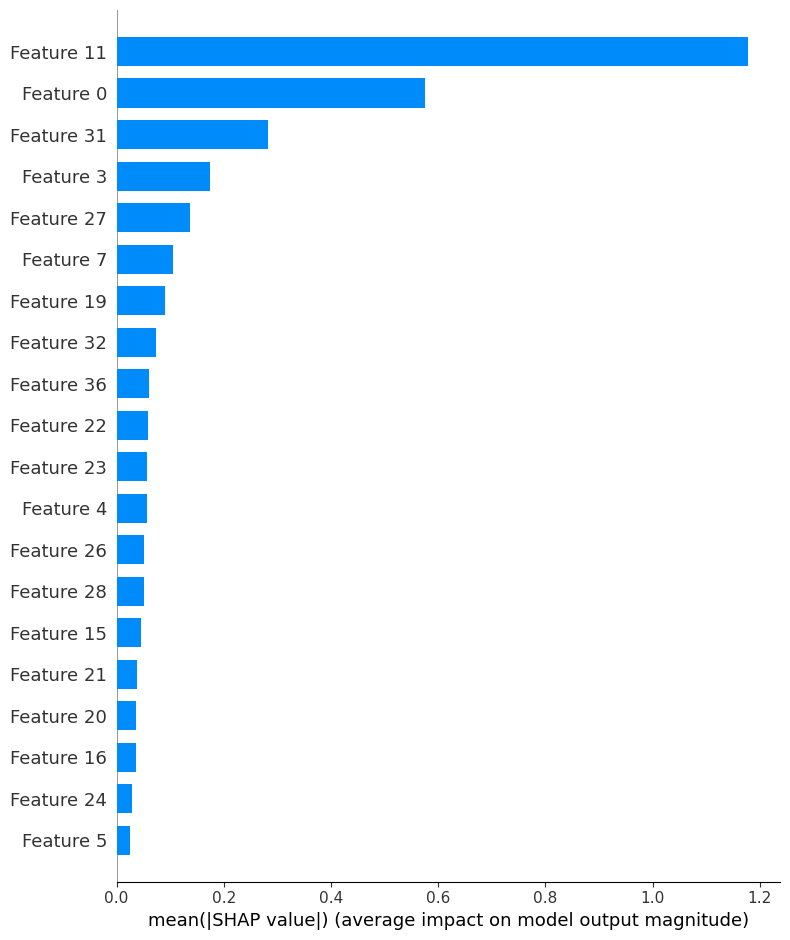

In [36]:
import shap

explainer = shap.TreeExplainer(predictor)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type = 'bar')

In [37]:
print (FinalNhl_df.columns)

Index(['Age', 'G/60', 'A/60', 'PTS/60', '+/-', 'PIM/60', 'EVG/60', 'PPG/GP',
       'SHG/GP', 'GWG/60', 'EV/60', 'PP/GP', 'SH/GP', 'SOG/60', 'SPCT',
       'TSA/60', 'FOW/60', 'FOL/60', 'FO%', 'BLK/60', 'HIT/60', 'TAKE/60',
       'GIVE/60', 'CF/60', 'CA/60', 'CF%', 'CF%_rel', 'FF/60', 'FA/60', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'E+/-', 'Thru%',
       'Salary'],
      dtype='object')


In [38]:
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(shap_values).mean(axis=0)
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

importance_df["perc_importance"] = importance_df["importance"] / importance_df["importance"].sum()
importance_df["cumulative_importance"] = importance_df["perc_importance"].cumsum()

print(importance_df.head(15))

       feature  importance  perc_importance  cumulative_importance
0   Feature 11    1.178571         0.338175               0.338175
1    Feature 0    0.574979         0.164982               0.503157
2   Feature 31    0.282767         0.081136               0.584293
3    Feature 3    0.174573         0.050091               0.634385
4   Feature 27    0.137128         0.039347               0.673731
5    Feature 7    0.105431         0.030252               0.703983
6   Feature 19    0.090345         0.025923               0.729906
7   Feature 32    0.073866         0.021195               0.751101
8   Feature 36    0.060619         0.017394               0.768495
9   Feature 22    0.058149         0.016685               0.785180
10  Feature 23    0.057551         0.016514               0.801694
11   Feature 4    0.056416         0.016188               0.817882
12  Feature 26    0.051668         0.014825               0.832707
13  Feature 28    0.050381         0.014456               0.84

In [39]:
nhl_guess = pd.DataFrame([(nhl_df.drop(columns = ['Player'])).mean()])
nhl_guess = nhl_guess.drop(columns= 'Salary')
pd.set_option("display.max_columns", None)
avg_reset = nhl_guess.copy()
avg_reset = avg_reset.rename(columns={avg_reset.columns[26]: 'CF%_rel'})
nhl_guess.head()


,Age,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,GWG/60,EV/60,PP/GP,SH/GP,SOG/60,SPCT,TSA/60,FOW/60,FOL/60,FO%,BLK/60,HIT/60,TAKE/60,GIVE/60,CF/60,CA/60,CF%,CF% rel,FF/60,FA/60,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%
0,27.868114,0.621863,1.004083,1.625945,-0.170284,1.672013,0.568281,0.034747,0.004533,0.095751,0.903963,0.065844,0.004694,5.743802,9.968614,11.969903,6.438981,6.503564,28.170284,3.013726,4.713935,0.96722,2.91329,58.663777,58.626601,49.94975,0.032888,41.609372,41.605475,49.920868,0.022705,9.665109,90.086311,99.754424,49.403339,50.596828,0.632888,47.310351


In [40]:
print(FinalNhl_df.columns[11])
print(FinalNhl_df.columns[0])
print(FinalNhl_df.columns[31])
print(FinalNhl_df.columns[3])
print(FinalNhl_df.columns[27])
print(FinalNhl_df.columns[7])
print(FinalNhl_df.columns[19])
print(FinalNhl_df.columns[32])
print(FinalNhl_df.columns[36])
print(FinalNhl_df.columns[22])
print(FinalNhl_df.columns[23])
print(FinalNhl_df.columns[4])
print(FinalNhl_df.columns[26])
print(FinalNhl_df.columns[28])
print(FinalNhl_df.columns[15])


PP/GP
Age
oiSH%
PTS/60
FF/60
PPG/GP
BLK/60
oiSV%
E+/-
GIVE/60
CF/60
+/-
CF%_rel
FA/60
TSA/60


In [41]:
#contract_prediction_avg = predictor.predict(nhl_guess)

#print(contract_prediction_avg)

In [42]:
nhl_guess = nhl_guess.rename(columns={nhl_guess.columns[26]: 'CF%_rel'})

In [43]:
def contract_predictor (pp_gp, age, oiSH, pts_60, ff_60, ppg_gp, blk_60, oiSV, e_plus, give_60, cf_60, plus_minus, cf_rel, FA_60, TSA_60):
    nhl_guess = X.sample(1).copy()
    items_1 = ['PP/GP', 'Age', 'oiSH%', 'PTS/60', 'FF/60', 'PPG/GP', 'BLK/60', 'oiSV%', 'E+/-', 'GIVE/60', 'CF/60', '+/-', 'CF%_rel', 'FA/60', 'TSA/60']
    items_2 = [pp_gp, age, oiSH, pts_60, ff_60, ppg_gp, blk_60, oiSV, e_plus, give_60, cf_60, plus_minus, cf_rel, FA_60, TSA_60]
    count = 0
    for i in items_1:
        nhl_guess[i] = items_2[count]
        count+=1

    nhl_guess = nhl_guess[X.columns]
    train_model = scale_factor.transform(nhl_guess)
    return predictor.predict(train_model)

In [44]:
row = nhl_df.loc[4]
print (row)

Player     mitch marner
Age                27.0
G/60            0.93823
A/60             2.6062
PTS/60          3.54443
+/-                  18
PIM/60          0.48649
EVG/60          0.91544
PPG/GP          0.07407
SHG/GP          0.01235
GWG/60          0.24325
EV/60           2.15128
PP/GP           0.33333
SH/GP           0.01235
SOG/60          6.01163
SPCT               15.6
TSA/60         13.65648
FOW/60          0.34749
FOL/60          0.83398
FO%                29.4
BLK/60          1.38997
HIT/60          1.70272
TAKE/60         1.94596
GIVE/60         3.68343
CF/60          61.70042
CA/60          61.70042
CF%                50.0
CF% rel             3.9
FF/60          44.44444
FA/60          44.12404
FF%                50.2
FF% rel             3.0
oiSH%              13.1
oiSV%              89.9
PDO               103.1
oZS%               48.6
dZS%               51.4
E+/-               11.6
Thru%              44.0
Salary           10.903
Name: 4, dtype: object
